In [1]:
from IPython import display

from pprint import pprint, pformat
from functools import reduce, cmp_to_key

from ginv import *

In [2]:
t = timer()
t.start()
fac = 1
for i in range(1, 50000):
    fac *= i
t.stop()
print(t)

userTime: 0.62, sysTime: 0.01, realTime: 0.64


In [3]:
print(allocator.maxMemory())
print(allocator.currMemory())
print(allocator.GC_timer())

0
0
GC userTime: 0.00, sysTime: 0.00, realTime: 0.00


In [4]:
p = randpermutation(4)
s = set()
for k in range(4*3*2*1):
    s.add(tuple(p[i] for i in range(4)))
    p.next()
pprint(s)
print(len(s), 4*3*2*1)

{(0, 1, 2, 3),
 (0, 1, 3, 2),
 (0, 3, 1, 2),
 (0, 3, 2, 1),
 (1, 0, 2, 3),
 (1, 0, 3, 2),
 (1, 2, 0, 3),
 (1, 3, 0, 2),
 (1, 3, 2, 0),
 (2, 1, 3, 0),
 (2, 3, 0, 1),
 (2, 3, 1, 0),
 (3, 0, 1, 2),
 (3, 0, 2, 1),
 (3, 1, 0, 2),
 (3, 1, 2, 0),
 (3, 2, 0, 1)}
17 24


In [5]:
p = randpermutation(4)
s = set()
for k in range(4*3*2*10):
    s.add(tuple(p[i] for i in range(4)))
    p.next()
pprint(s)
print(len(s), 4*3*2*1)

{(0, 1, 2, 3),
 (0, 1, 3, 2),
 (0, 2, 1, 3),
 (0, 2, 3, 1),
 (0, 3, 1, 2),
 (0, 3, 2, 1),
 (1, 0, 2, 3),
 (1, 0, 3, 2),
 (1, 2, 0, 3),
 (1, 2, 3, 0),
 (1, 3, 0, 2),
 (1, 3, 2, 0),
 (2, 0, 1, 3),
 (2, 0, 3, 1),
 (2, 1, 0, 3),
 (2, 1, 3, 0),
 (2, 3, 0, 1),
 (2, 3, 1, 0),
 (3, 0, 1, 2),
 (3, 0, 2, 1),
 (3, 1, 0, 2),
 (3, 1, 2, 0),
 (3, 2, 0, 1),
 (3, 2, 1, 0)}
24 24


In [6]:
size, pos = 12, 3
monom.zero(size, pos)

[3 0:0 0 0 0 0 0 0 0 0 0 0 0]

In [7]:
size, pos = 4, -1
vars = [monom.variable(i, size, pos) for i in range(size)]
pprint(vars)
print((vars[1]**3*vars[2]).divisiable(vars[2]*vars[1]))
(vars[1]**3*vars[2])/(vars[2]*vars[1])

[[-1 1:1 0 0 0], [-1 1:0 1 0 0], [-1 1:0 0 1 0], [-1 1:0 0 0 1]]
True


[-1 2:0 2 0 0]

In [8]:
for k in range(3):
    p.next()
    print(tuple(p[i] for i in range(4)), ":")
    print([v.permutation(p) for v in vars])

(2, 0, 1, 3) :
[[-1 1:0 1 0 0], [-1 1:0 0 1 0], [-1 1:1 0 0 0], [-1 1:0 0 0 1]]
(1, 2, 3, 0) :
[[-1 1:0 0 0 1], [-1 1:1 0 0 0], [-1 1:0 1 0 0], [-1 1:0 0 1 0]]
(0, 1, 2, 3) :
[[-1 1:1 0 0 0], [-1 1:0 1 0 0], [-1 1:0 0 1 0], [-1 1:0 0 0 1]]


In [9]:
size, deg1, deg2 = 4, 1, 5
monom.rand_init(size, deg1, deg2)
m = reduce(lambda x, y: x*y, [monom.next() for i in range(3)])
print(m)
print(repr(m))
print("degree -", m.degree())
print("   pos -", m.pos())
print("*".join("x_%d**%d" % (i, m[i]) for i in range(len(m))))
print([d for d in m])

[2 0 2 4]
[-1 8:2 0 2 4]
degree - 8
   pos - -1
x_0**2*x_1**0*x_2**2*x_3**4
[2, 0, 2, 4]


In [10]:
monom.rand_init(6, 2, 9)
for i in range(5):
    m = monom.next()
    print(m**2)

[2 4 4 4 4 0]
[0 0 0 2 2 0]
[0 0 2 2 2 0]
[2 0 2 2 2 6]
[0 0 4 2 4 0]


In [11]:
monom.rand_init(10, 2, 9)
for i in range(-1, 5):
    m = monom.next()
    m.setPos(i)
    print(m)

[1 1 0 0 0 2 2 2 0 1]
[0:1 0 1 0 2 1 0 1 0 0]
[1:0 0 0 0 1 0 1 1 1 0]
[2:1 0 0 2 0 0 0 0 0 2]
[3:0 0 0 2 0 1 1 1 2 0]
[4:0 0 0 1 1 0 1 1 0 1]


In [12]:
monom.rand_init(10, 2, 12)
lst = [monom.next().setPos(i) for i in range(-1, 7)]
print("lex:")
pprint(sorted(lst, key=cmp_to_key(lambda x, y: x.lex(y))))
print("deglex:")
pprint(sorted(lst, key=cmp_to_key(lambda x, y: x.deglex(y))))
print("alex:")
pprint(sorted(lst, key=cmp_to_key(lambda x, y: x.alex(y))))
print("POT:")
pprint(sorted(lst, key=lambda x: x.pos()))

lex:
[[2 2:0 0 0 0 0 0 0 0 1 1],
 [0 5:0 0 0 0 1 1 0 2 0 1],
 [4 9:0 0 1 0 0 3 2 0 2 1],
 [-1 5:0 2 1 0 0 0 1 1 0 0],
 [1 4:1 0 1 1 1 0 0 0 0 0],
 [6 8:1 0 2 1 0 0 1 1 0 2],
 [5 8:1 2 1 0 0 1 1 1 0 1],
 [3 12:1 2 4 2 0 1 0 0 0 2]]
deglex:
[[2 2:0 0 0 0 0 0 0 0 1 1],
 [1 4:1 0 1 1 1 0 0 0 0 0],
 [0 5:0 0 0 0 1 1 0 2 0 1],
 [-1 5:0 2 1 0 0 0 1 1 0 0],
 [6 8:1 0 2 1 0 0 1 1 0 2],
 [5 8:1 2 1 0 0 1 1 1 0 1],
 [4 9:0 0 1 0 0 3 2 0 2 1],
 [3 12:1 2 4 2 0 1 0 0 0 2]]
alex:
[[3 12:1 2 4 2 0 1 0 0 0 2],
 [4 9:0 0 1 0 0 3 2 0 2 1],
 [6 8:1 0 2 1 0 0 1 1 0 2],
 [5 8:1 2 1 0 0 1 1 1 0 1],
 [0 5:0 0 0 0 1 1 0 2 0 1],
 [-1 5:0 2 1 0 0 0 1 1 0 0],
 [1 4:1 0 1 1 1 0 0 0 0 0],
 [2 2:0 0 0 0 0 0 0 0 1 1]]
POT:
[[-1 5:0 2 1 0 0 0 1 1 0 0],
 [0 5:0 0 0 0 1 1 0 2 0 1],
 [1 4:1 0 1 1 1 0 0 0 0 0],
 [2 2:0 0 0 0 0 0 0 0 1 1],
 [3 12:1 2 4 2 0 1 0 0 0 2],
 [4 9:0 0 1 0 0 3 2 0 2 1],
 [5 8:1 2 1 0 0 1 1 1 0 1],
 [6 8:1 0 2 1 0 0 1 1 0 2]]


In [13]:
pls = [poly_int.to_monom("TOP", "lex", v) for v in vars]
pprint(pls)

[[-1 1:1 0 0 0]*0x1 + ...,
 [-1 1:0 1 0 0]*0x1 + ...,
 [-1 1:0 0 1 0]*0x1 + ...,
 [-1 1:0 0 0 1]*0x1 + ...]


In [14]:
for p in pls:
    print(" + ".join(["%s*%s" % (m, c) for m, c in p]))

[1 0 0 0]*1
[0 1 0 0]*1
[0 0 1 0]*1
[0 0 0 1]*1


In [15]:
for p in pls:
    print(p.order(), p.size())

('TOP', 'lex') 4
('TOP', 'lex') 4
('TOP', 'lex') 4
('TOP', 'lex') 4


In [16]:
print(poly_int.to_monom("TOP", "deglex", vars[0]).comparable(pls[0]))
print(poly_int.to_monom("POT", "lex", vars[0]).comparable(pls[0]))
print(poly_int.to_monom("TOP", "lex", vars[0]).comparable(pls[0]))

False
False
True


In [17]:
r = (pls[0]*12 + 1)*(-pls[1] + 2)*(pls[2] + 3)*(pls[3] - 4)
print(r)
print(" + ".join(["%s*%r" % (m, c) for m, c in r]))

[1 1 1 1]*-12 + ...
[1 1 1 1]*-0xc + [1 1 1 0]*0x30 + [1 1 0 1]*-0x24 + [1 1 0 0]*0x90 + [1 0 1 1]*0x18 + [1 0 1 0]*-0x60 + [1 0 0 1]*0x48 + [1 0 0 0]*-0x120 + [0 1 1 1]*-0x1 + [0 1 1 0]*0x4 + [0 1 0 1]*-0x3 + [0 1 0 0]*0xc + [0 0 1 1]*0x2 + [0 0 1 0]*-0x8 + [0 0 0 1]*0x6 + [0 0 0 0]*-0x18


In [18]:
s = r**3*1289381093812093821098309283
print(" + ".join(["%s*%s" % (m, c) for m, c in s]))

[3 3 3 3]*-2228050530107298122857878441024 + [3 3 3 2]*26736606361287577474294541292288 + [3 3 3 1]*-106946425445150309897178165169152 + [3 3 3 0]*142595233926867079862904220225536 + [3 3 2 3]*-20052454770965683105720905969216 + [3 3 2 2]*240629457251588197268650871630592 + [3 3 2 1]*-962517829006352789074603486522368 + [3 3 2 0]*1283357105341803718766137982029824 + [3 3 1 3]*-60157364312897049317162717907648 + [3 3 1 2]*721888371754764591805952614891776 + [3 3 1 1]*-2887553487019058367223810459567104 + [3 3 1 0]*3850071316025411156298413946089472 + [3 3 0 3]*-60157364312897049317162717907648 + [3 3 0 2]*721888371754764591805952614891776 + [3 3 0 1]*-2887553487019058367223810459567104 + [3 3 0 0]*3850071316025411156298413946089472 + [3 2 3 3]*13368303180643788737147270646144 + [3 2 3 2]*-160419638167725464845767247753728 + [3 2 3 1]*641678552670901859383068991014912 + [3 2 3 0]*-855571403561202479177425321353216 + [3 2 2 3]*120314728625794098634325435815296 + [3 2 2 2]*-144377674350952

In [19]:
print("s.isZero() -", s.isZero())
print("len(s)     -", len(s))
print("s.degree() -", s.degree())
print("s.norm()   -", s.norm())
print("s.lm()     -", s.lm())
print("s.lc()     -", s.lc())
print("s.isPp()   -", s.isPp())

s.isZero() - False
len(s)     - 256
s.degree() - 12
s.norm()   - 512
s.lm()     - [3 3 3 3]
s.lc()     - -2228050530107298122857878441024
s.isPp()   - False


In [20]:
s.pp()
print(" + ".join(["%s*%s" % (m, c) for m, c in s]))
print("s.isPp()   -", s.isPp())

[3 3 3 3]*-1728 + [3 3 3 2]*20736 + [3 3 3 1]*-82944 + [3 3 3 0]*110592 + [3 3 2 3]*-15552 + [3 3 2 2]*186624 + [3 3 2 1]*-746496 + [3 3 2 0]*995328 + [3 3 1 3]*-46656 + [3 3 1 2]*559872 + [3 3 1 1]*-2239488 + [3 3 1 0]*2985984 + [3 3 0 3]*-46656 + [3 3 0 2]*559872 + [3 3 0 1]*-2239488 + [3 3 0 0]*2985984 + [3 2 3 3]*10368 + [3 2 3 2]*-124416 + [3 2 3 1]*497664 + [3 2 3 0]*-663552 + [3 2 2 3]*93312 + [3 2 2 2]*-1119744 + [3 2 2 1]*4478976 + [3 2 2 0]*-5971968 + [3 2 1 3]*279936 + [3 2 1 2]*-3359232 + [3 2 1 1]*13436928 + [3 2 1 0]*-17915904 + [3 2 0 3]*279936 + [3 2 0 2]*-3359232 + [3 2 0 1]*13436928 + [3 2 0 0]*-17915904 + [3 1 3 3]*-20736 + [3 1 3 2]*248832 + [3 1 3 1]*-995328 + [3 1 3 0]*1327104 + [3 1 2 3]*-186624 + [3 1 2 2]*2239488 + [3 1 2 1]*-8957952 + [3 1 2 0]*11943936 + [3 1 1 3]*-559872 + [3 1 1 2]*6718464 + [3 1 1 1]*-26873856 + [3 1 1 0]*35831808 + [3 1 0 3]*-559872 + [3 1 0 2]*6718464 + [3 1 0 1]*-26873856 + [3 1 0 0]*35831808 + [3 0 3 3]*13824 + [3 0 3 2]*-165888 + [3 0

In [21]:
for i in range(11):
    print(s.reduction(r))

[3 3 3 2]*-13824 + ...
[3 3 3 1]*-27648 + ...
[3 3 2 3]*10368 + ...
[3 3 2 2]*82944 + ...
[3 3 2 1]*165888 + ...
[3 3 1 3]*-15552 + ...
[3 3 1 2]*-124416 + ...
[3 3 1 1]*-248832 + ...
[3 2 3 3]*-6912 + ...
[3 2 3 2]*-55296 + ...
[3 2 3 1]*-110592 + ...


In [22]:
print(allocator.maxMemory())
print(allocator.currMemory())
print(allocator.GC_timer())

647168
643072
GC userTime: 0.00, sysTime: 0.00, realTime: 0.00


In [23]:
basis = janet_poly_int()

In [24]:
print(basis.comparable(poly_int.to_monom("TOP", "deglex", vars[0])))

True


In [25]:
basis.push(r)
print(basis.comparable(poly_int.to_monom("TOP", "deglex", vars[0])))

False


In [26]:
basis.push(s)
basis.build()
len(basis)

1

In [27]:
for p in basis:
    print(p)
    print(" + ".join(["%s*%s" % (m, c) for m, c in p.poly()]))

[1 1 1 1][1 1 1 1][    ]
[1 1 1 1]*-12 + [1 1 1 0]*48 + [1 1 0 1]*-36 + [1 1 0 0]*144 + [1 0 1 1]*24 + [1 0 1 0]*-96 + [1 0 0 1]*72 + [1 0 0 0]*-288 + [0 1 1 1]*-1 + [0 1 1 0]*4 + [0 1 0 1]*-3 + [0 1 0 0]*12 + [0 0 1 1]*2 + [0 0 1 0]*-8 + [0 0 0 1]*6 + [0 0 0 0]*-24


In [28]:
size = 5
x = [poly_int.to_monom("TOP", "deglex", monom.variable(i, size, -1)) for i in range(size)]

In [29]:
q = [reduce(lambda x, y: x+y, 
    [x[i] for i in range(size)])]
q.append(reduce(lambda x, y: x+y, 
    [x[i]*x[(i+1) % size] for i in range(size)]))
q.append(reduce(lambda x, y: x+y, 
    [x[i]*x[(i+1) % size]*x[(i+2) % size] for i in range(size)]))
q.append(reduce(lambda x, y: x+y, 
    [x[i]*x[(i+1) % size]*x[(i+2) % size]*x[(i+3) % size] for i in range(size)]))
q.append(reduce(lambda x, y: x*y, 
    [x[i] for i in range(size)]) - 1)

In [30]:
for i in range(size):
    print(" + ".join(["%s*%s" % (m, c) for m, c in q[i]]))

[1 0 0 0 0]*1 + [0 1 0 0 0]*1 + [0 0 1 0 0]*1 + [0 0 0 1 0]*1 + [0 0 0 0 1]*1
[1 1 0 0 0]*1 + [0 1 1 0 0]*1 + [0 0 1 1 0]*1 + [1 0 0 0 1]*1 + [0 0 0 1 1]*1
[1 1 1 0 0]*1 + [0 1 1 1 0]*1 + [1 1 0 0 1]*1 + [1 0 0 1 1]*1 + [0 0 1 1 1]*1
[1 1 1 1 0]*1 + [1 1 1 0 1]*1 + [1 1 0 1 1]*1 + [1 0 1 1 1]*1 + [0 1 1 1 1]*1
[1 1 1 1 1]*1 + [0 0 0 0 0]*-1


In [31]:
cyclic5 = janet_poly_int()
for i in range(size):
    cyclic5.push(q[i])
cyclic5.build()
print("len(cyclic5) -", len(cyclic5))
print("cyclic5.maxPos() -", cyclic5.maxPos())
print("cyclic5.reduction() -", cyclic5.reduction())
print("cyclic5.timer() -", cyclic5.timer())

len(cyclic5) - 23
cyclic5.maxPos() - -1
cyclic5.reduction() - 3120
cyclic5.timer() - userTime: 0.00, sysTime: 0.00, realTime: 0.00


In [32]:
for p in cyclic5:
    print(p)
    print(" + ".join(["%s*%s" % (m, c) for m, c in p.poly()]))

[0 0 0 0 8][0 0 0 0 8][**** ]
[0 0 0 0 8]*-1 + [0 1 1 1 0]*-42 + [0 0 2 1 0]*-21 + [0 1 0 2 0]*165 + [0 0 1 2 0]*-42 + [0 0 0 3 0]*55 + [0 1 1 0 1]*76 + [0 0 2 0 1]*55 + [0 1 0 1 1]*-13 + [0 0 1 1 1]*131 + [0 0 0 2 1]*21 + [0 1 0 0 2]*-186 + [0 0 1 0 2]*-21 + [0 0 0 1 2]*42 + [0 0 0 0 3]*-219
[0 0 0 1 7][0 0 0 1 7][**** ]
[0 0 0 1 7]*1 + [0 1 1 1 0]*-110 + [0 0 2 1 0]*-55 + [0 1 0 2 0]*52 + [0 0 1 2 0]*60 + [0 0 0 3 0]*39 + [0 1 1 0 1]*29 + [0 0 2 0 1]*-26 + [0 1 0 1 1]*-34 + [0 0 1 1 1]*-102 + [0 0 0 2 1]*120 + [0 1 0 0 2]*63 + [0 0 1 0 2]*-120 + [0 0 0 1 2]*109 + [0 0 0 0 3]*-26
[0 0 1 0 7][0 0 1 0 7][**** ]
[0 0 1 0 7]*1 + [0 1 1 1 0]*-16 + [0 0 2 1 0]*-8 + [0 1 0 2 0]*63 + [0 0 1 2 0]*-16 + [0 0 0 3 0]*21 + [0 1 1 0 1]*29 + [0 0 2 0 1]*21 + [0 1 0 1 1]*-5 + [0 0 1 1 1]*50 + [0 0 0 2 1]*8 + [0 1 0 0 2]*-71 + [0 0 1 0 2]*-9 + [0 0 0 1 2]*16 + [0 0 0 0 3]*-84
[0 0 0 2 6][0 0 0 2 6][**** ]
[0 0 0 2 6]*1 + [0 1 1 1 0]*28 + [0 0 2 1 0]*14 + [0 1 0 2 0]*-21 + [0 0 1 2 0]*-12 + [0 0 0 3 0]

In [33]:
print(cyclic5.maxPos())
cyclic5.janet(-1).draw("png", "./cyclic5.png")
cyclic5.janet(-1).size()

-1


23

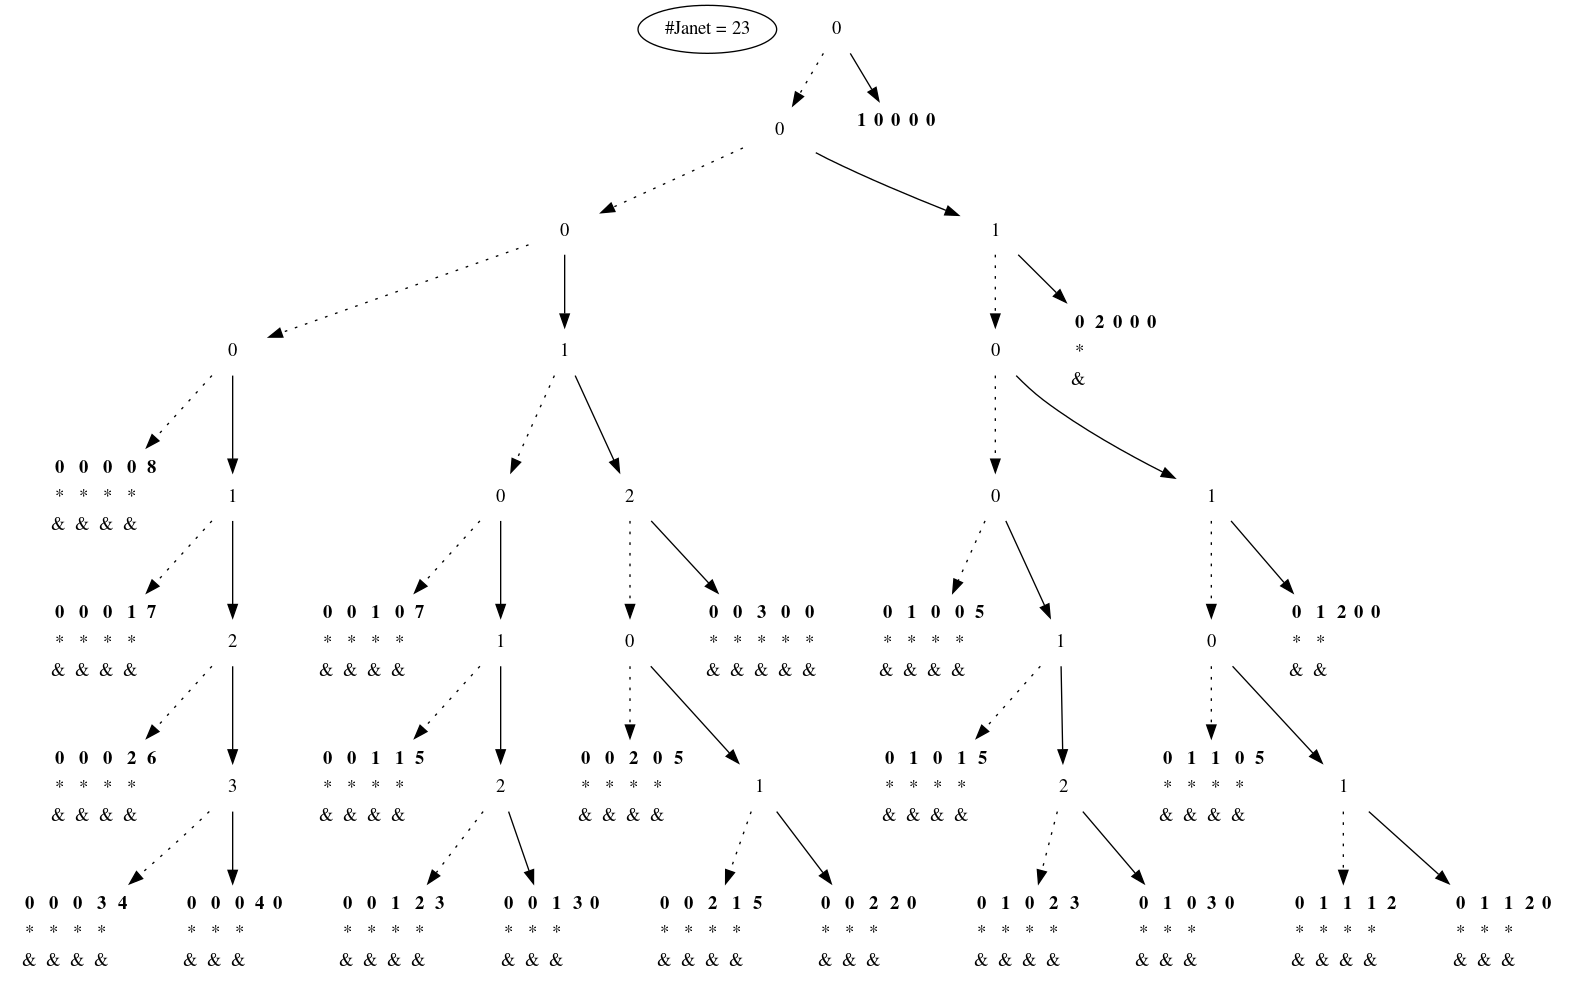

In [34]:
display.Image("./cyclic5.png")

In [35]:
p = cyclic5.nf((x[0] + 1)**3)
print(" + ".join(["%s*%s" % (m, c) for m, c in p]))

[0 1 1 1 0]*6 + [0 0 2 1 0]*3 + [0 1 0 2 0]*3 + [0 0 1 2 0]*6 + [0 0 0 3 0]*2 + [0 1 1 0 1]*-1 + [0 0 1 1 1]*4 + [0 0 0 2 1]*3 + [0 0 1 0 2]*2 + [0 0 0 0 3]*1 + [0 1 1 0 0]*-6 + [0 0 2 0 0]*-3 + [0 1 0 1 0]*-3 + [0 0 1 1 0]*-9 + [0 0 0 2 0]*-3 + [0 0 1 0 1]*-3 + [0 0 0 1 1]*-6 + [0 1 0 0 0]*3 + [0 0 1 0 0]*3 + [0 0 0 1 0]*3 + [0 0 0 0 1]*3 + [0 0 0 0 0]*-1


In [36]:
p = cyclic5.nf(x[2]*x[4])
print(" + ".join(["%s*%s" % (m, c) for m, c in p]))

[0 0 1 0 1]*1
